In [1]:
import numpy as np
import matplotlib.pyplot as plt

from cvt_utils import SpaceIterMesh
from plot_utils import display_plots, plot_cell_size_and_density, plot_seeds_and_cells, plot_bound_paths, display_animation, plot_computed_cell_size

plt.style.use("dark_background")
np.random.seed(23)

# Problem definition
x_min = 0.0
x_max = 1.0
dx_min = 1.0e-5
# n_cells = 50
n_cells = 100
# n_iters = 300
# n_iters = 1000
# n_iters = 2000
# n_iters = 5000
# n_iters = 6000
# n_iters = 7000
# n_iters = 10_000
n_iters = 15_000

mesh = SpaceIterMesh(x_min, x_max, n_cells, n_iters)

# Cell size function
# mesh.cell_size = lambda x: 1.0 + 0.0 * x
# mesh.cell_size = lambda x: np.exp(2*x)
# mesh.cell_size = lambda x: 0.51 + 0.5 * np.sin(2 * np.pi * x)
mesh.cell_size = lambda x: 0.5025 + 0.5 * np.sin(2 * np.pi * (x - 0.05))

# Check cell size function
x = np.linspace(x_min, x_max, 1000) 
assert np.all(mesh.cell_size(x) > dx_min), "Cell size must be positive"

Cell size stats:
min: 0.0025
max: 1.0025
mean: 0.502
std: 0.353

Cell density min: 0.998
Cell density max: 399.937
Cell density mean: 19.958
Cell density std: 60.022


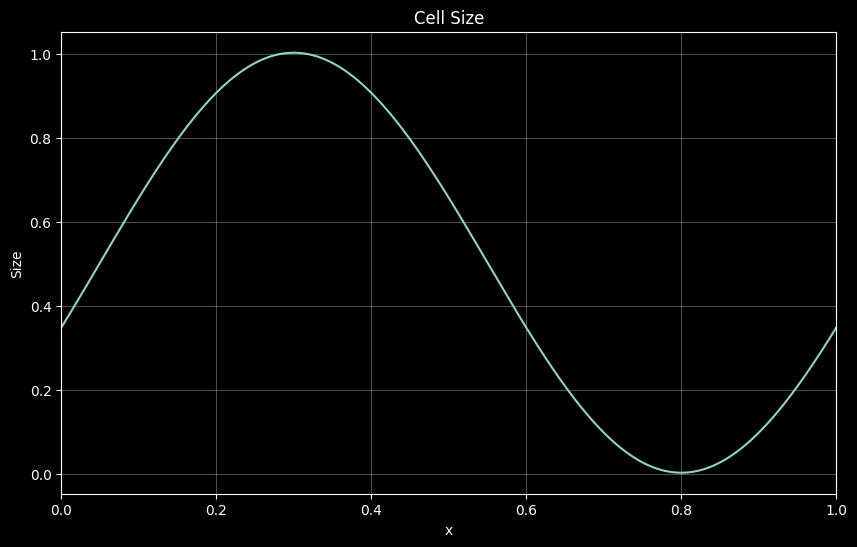

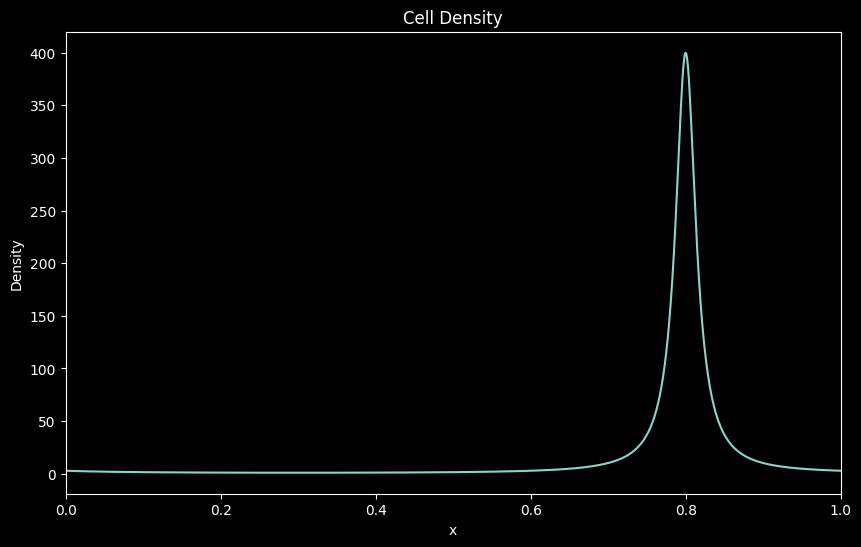

In [2]:
# Print cell size statistics
x = np.linspace(x_min, x_max, 1000)
assert mesh.cell_size is not None, "Cell size function not set"
print("Cell size stats:")
print(f"min: {np.min(mesh.cell_size(x)):.4f}")
print(f"max: {np.max(mesh.cell_size(x)):.4f}") # Should be 0.505 
print(f"mean: {np.mean(mesh.cell_size(x)):.3f}")
print(f"std: {np.std(mesh.cell_size(x)):.3f}")

# Print cell density statistics
print()
print(f"Cell density min: {np.min(mesh.cell_density(x)):.3f}")
print(f"Cell density max: {np.max(mesh.cell_density(x)):.3f}")
print(f"Cell density mean: {np.mean(mesh.cell_density(x)):.3f}")
print(f"Cell density std: {np.std(mesh.cell_density(x)):.3f}")

# Plot cell size and density
plot_cell_size_and_density(mesh)

### Iterations

In [3]:
mesh.set_initial_conditions()
mesh.set_boundary_conditions()

for iter in range(n_iters):
    mesh.update_cell_bounds(iter)
    if iter < n_iters - 1:
        mesh.update_cell_seeds(iter)

In [4]:
html = display_animation(mesh, duration=6.0, fps=60)
html

Duration: 6.0s
fps: 60
# of frames: 360
Interval: 16ms


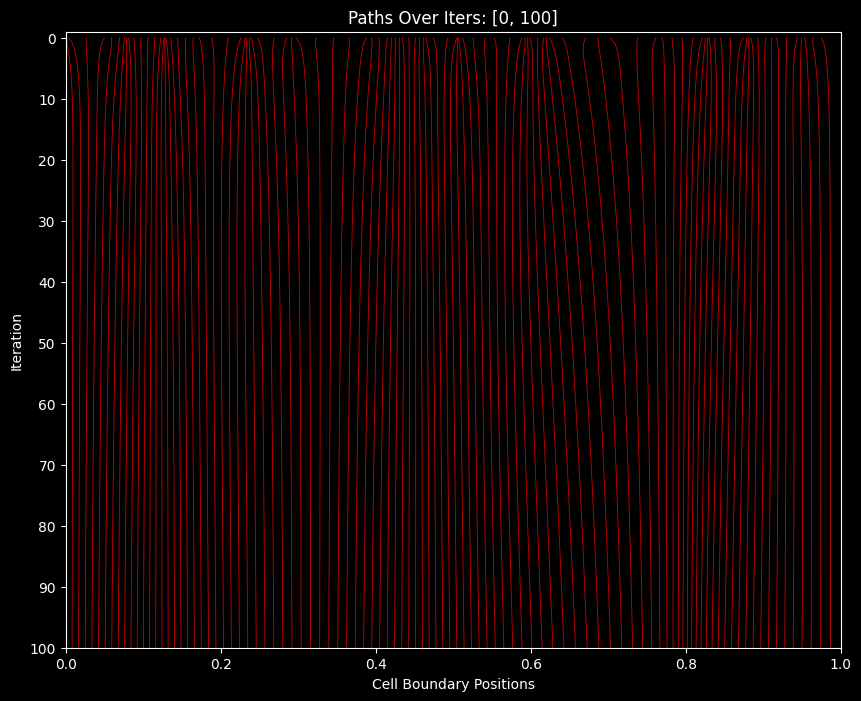

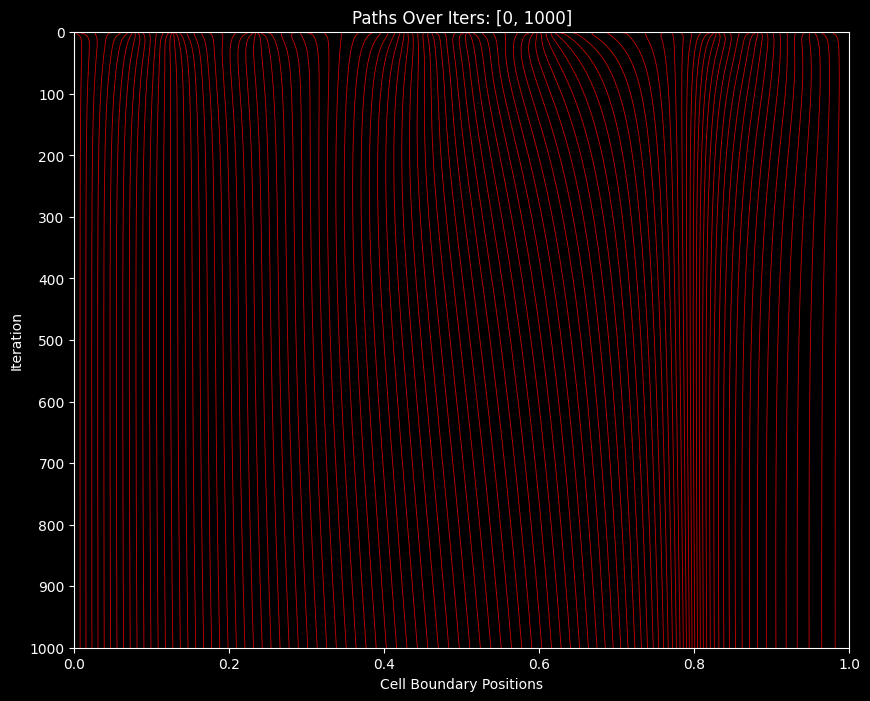

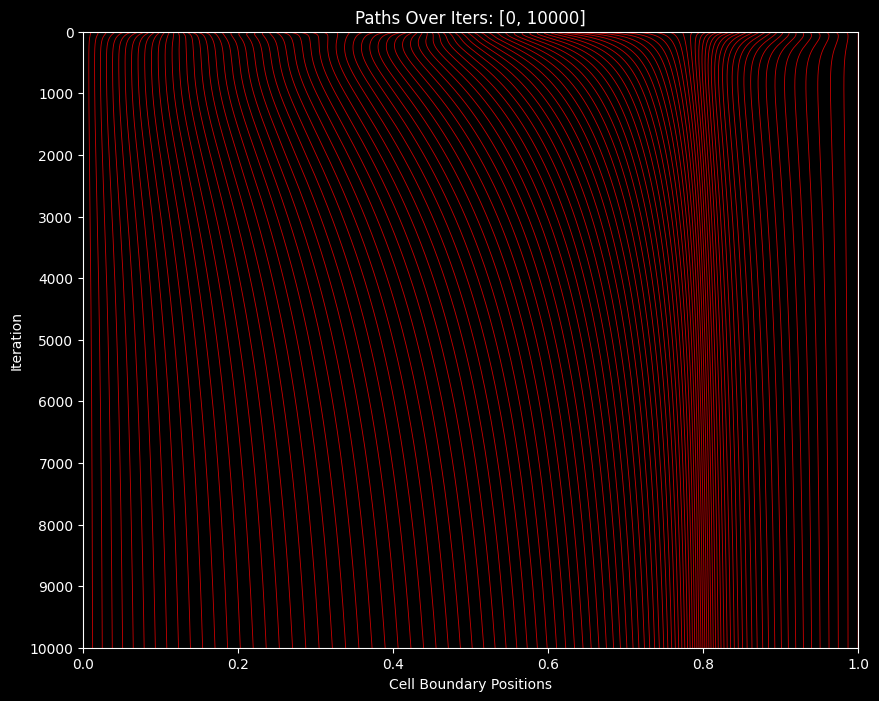

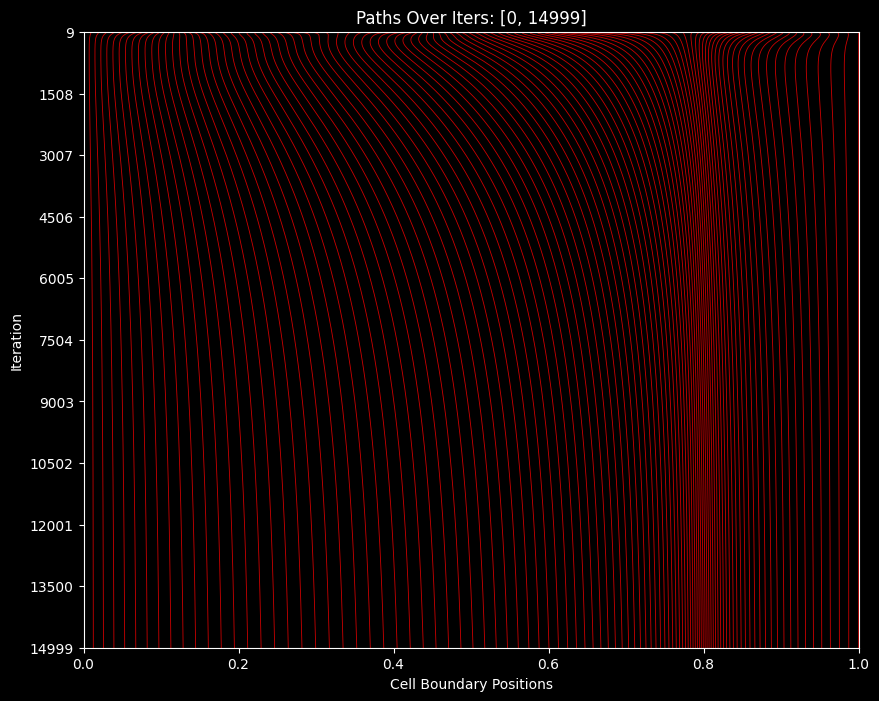

In [5]:
plot_bound_paths(mesh, 0, 100)
plot_bound_paths(mesh, 0, 1000)
plot_bound_paths(mesh, 0, 10000)
plot_bound_paths(mesh, 0, n_iters - 1)

### Convergence

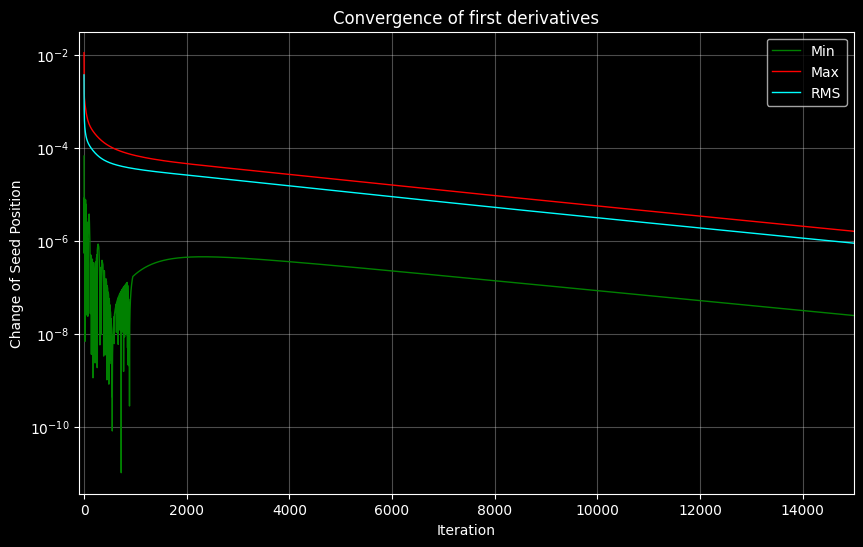

In [6]:
# Compute first derivative of the seed positions over iterations (dx/di = dx)
dseed_matrix = np.diff(mesh.seed_matrix, axis=0)

# Plot the min, max, RMS, and std of the first derivative of the seed positions over iterations
min_dseed = np.min(np.abs(dseed_matrix), axis=1)
max_dseed = np.max(np.abs(dseed_matrix), axis=1)
rms_dseed = np.sqrt(np.mean(dseed_matrix**2, axis=1))

display_plots([
    {"args": (min_dseed, ), "kwargs": {"label": "Min", "linewidth": 1, "color": "green"}},
    {"args": (max_dseed, ), "kwargs": {"label": "Max", "linewidth": 1, "color": "red"}},
    {"args": (rms_dseed, ), "kwargs": {"label": "RMS", "linewidth": 1, "color": "cyan"}},
], "Convergence of first derivatives", "Iteration", "Change of Seed Position", ylog=True, xlims=(-100, n_iters))

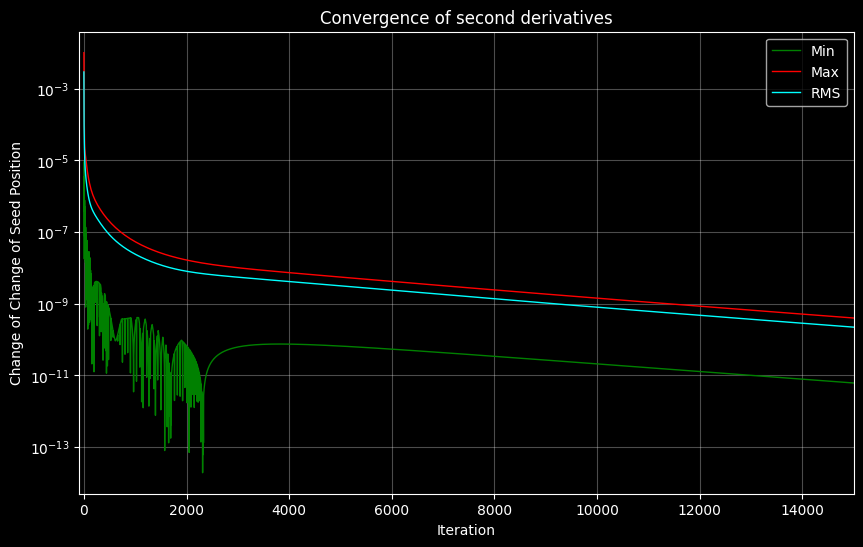

In [7]:
# Compute second derivative of the seed positions over iterations
d2seed_matrix = np.diff(dseed_matrix, axis=0)

# Plot the min, max, and RMS of the second derivative of the seed positions over iterations
min_d2seed = np.min(np.abs(d2seed_matrix), axis=1)
max_d2seed = np.max(np.abs(d2seed_matrix), axis=1)
rms_d2seed = np.sqrt(np.mean(d2seed_matrix**2, axis=1))

display_plots([
    {"args": (min_d2seed, ), "kwargs": {"label": "Min", "linewidth": 1, "color": "green"}},
    {"args": (max_d2seed, ), "kwargs": {"label": "Max", "linewidth": 1, "color": "red"}},
    {"args": (rms_d2seed, ), "kwargs": {"label": "RMS", "linewidth": 1, "color": "cyan"}},
], "Convergence of second derivatives", "Iteration", "Change of Change of Seed Position", ylog=True, xlims=(-100, n_iters))

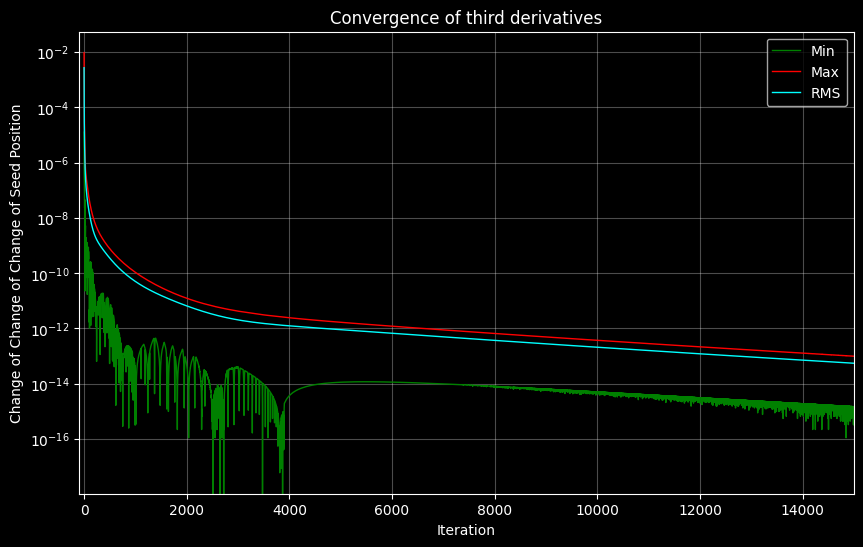

In [8]:
# Compute third derivative of the seed positions over iterations
d3seed_matrix = np.diff(d2seed_matrix, axis=0)

# Plot the min, max, and RMS of the third derivative of the seed positions over iterations
min_d3seed = np.min(np.abs(d3seed_matrix), axis=1)
max_d3seed = np.max(np.abs(d3seed_matrix), axis=1)
rms_d3seed = np.sqrt(np.mean(d3seed_matrix**2, axis=1))

display_plots([
    {"args": (min_d3seed, ), "kwargs": {"label": "Min", "linewidth": 1, "color": "green"}},
    {"args": (max_d3seed, ), "kwargs": {"label": "Max", "linewidth": 1, "color": "red"}},
    {"args": (rms_d3seed, ), "kwargs": {"label": "RMS", "linewidth": 1, "color": "cyan"}},
], "Convergence of third derivatives", "Iteration", "Change of Change of Change of Seed Position", ylog=True, xlims=(-100, n_iters))

min: 0.9991211522
max: 1.0029355933
rms: 1.0005107500


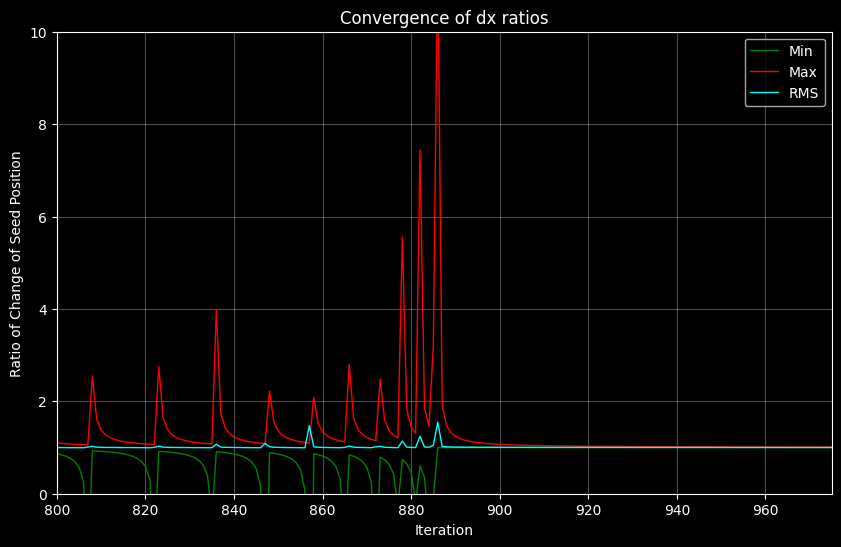

In [9]:
# Compute first derivative of the seed positions over iterations (dx/di = dx)
dx = np.diff(mesh.seed_matrix, axis=0)

# Compute ratios of successive changes in seed positions
ratios = dx[1:, :] / dx[:-1, :]
# ratios = np.abs(dx[1:, :] / dx[:-1, :])

# Plot the min, max, and RMS of the ratios over iterations
min_ratios = np.min(ratios, axis=1)
max_ratios = np.max(ratios, axis=1)
rms_ratios = np.sqrt(np.mean(ratios**2, axis=1))

# Print min, max, and RMS of the ratios after 400 iterations
n = 1100
print(f"min: {np.min(ratios[n, :]):.10f}")
print(f"max: {np.max(ratios[n, :]):.10f}")
print(f"rms: {np.sqrt(np.mean(ratios[n, :]**2)):.10f}")

display_plots([
    {"args": (min_ratios, ), "kwargs": {"label": "Min", "linewidth": 1, "color": "green"}},
    {"args": (max_ratios, ), "kwargs": {"label": "Max", "linewidth": 1, "color": "red"}},
    {"args": (rms_ratios, ), "kwargs": {"label": "RMS", "linewidth": 1, "color": "cyan"}},
], "Convergence of dx ratios", "Iteration", "Ratio of Change of Seed Position", xlims=(800, 975), ylims=(0, 10))

min: -0.0000748
max: 0.0000013
rms: 0.0000187


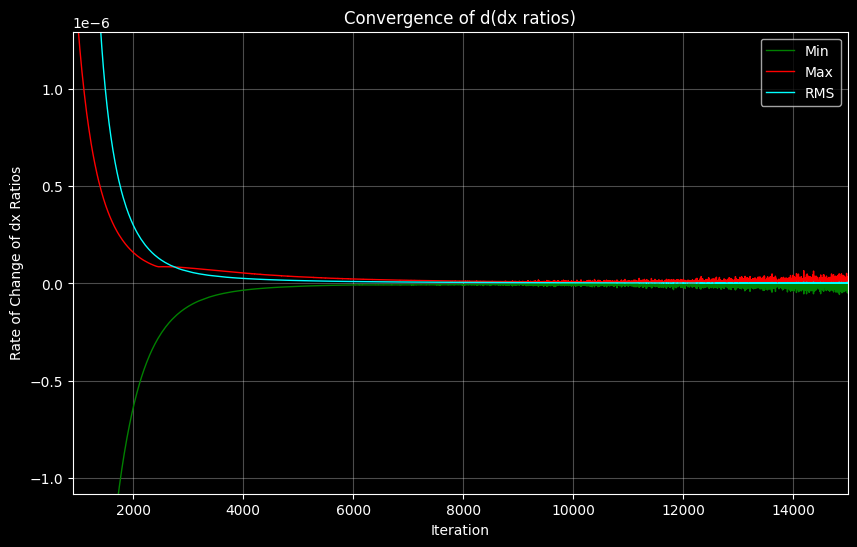

In [10]:
# Compute rate of change of the ratios over iterations
dratios = np.diff(ratios, axis=0)

# Plot the min, max, and RMS of the ratios over iterations  
min_dratios = np.min(dratios, axis=1)
max_dratios = np.max(dratios, axis=1)
rms_dratios = np.sqrt(np.mean(dratios**2, axis=1))

# Print min, max, and RMS of the ratios after 400 iterations
n = 1000
print(f"min: {np.min(dratios[n, :]):.7f}")
print(f"max: {np.max(dratios[n, :]):.7f}")
print(f"rms: {np.sqrt(np.mean(dratios[n, :]**2)):.7f}")

display_plots([
    {"args": (min_dratios, ), "kwargs": {"label": "Min", "linewidth": 1, "color": "green"}},
    {"args": (max_dratios, ), "kwargs": {"label": "Max", "linewidth": 1, "color": "red"}},
    {"args": (rms_dratios, ), "kwargs": {"label": "RMS", "linewidth": 1, "color": "cyan"}},
], "Convergence of d(dx ratios)", "Iteration", "Rate of Change of dx Ratios", xlims=(900, n_iters), ylims=(-0.00000107938, 0.0000012924))

### Mesh size

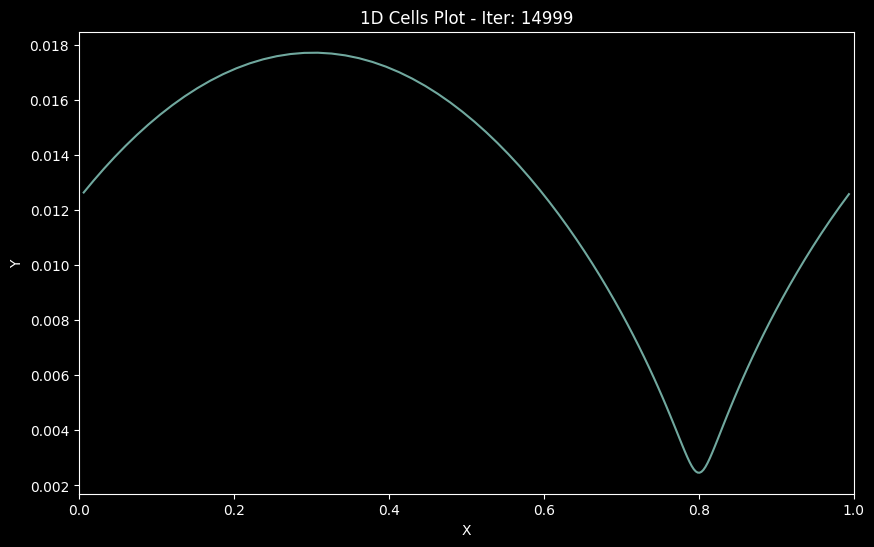

In [11]:
plot_computed_cell_size(mesh)

### Energy

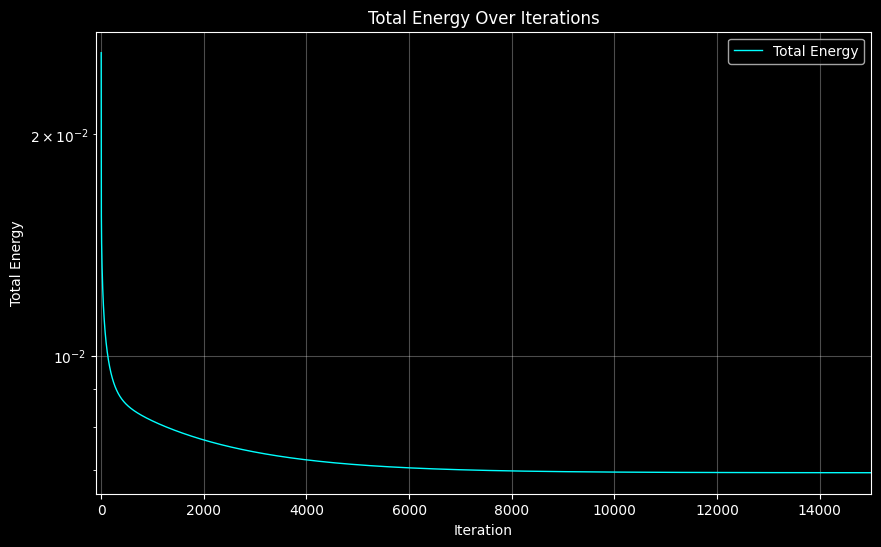

In [12]:
# Compute total energy per iteration on a log scale
total_energy = mesh.total_energy()

# Plot total energy
display_plots([
    {"args": (np.sqrt(total_energy), ), "kwargs": {"label": "Total Energy", "linewidth": 1, "color": "cyan"}},
], "Total Energy Over Iterations", "Iteration", "Total Energy", ylog=True, xlims=(-100, n_iters))